In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVC
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
np.random.seed(42)
n_samples=200
X_reg = np.random.rand(n_samples, 10)*100
y_reg= X_reg.dot(np.random.randn(10)) +np.random.randn(n_samples) *10
X_class=np.random.rand(n_samples, 10) *100
y_class=np.random.choice([0,1], size=n_samples)

In [8]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [10]:
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg= xgb_regressor.predict(X_test_reg)
mse=mean_squared_error(y_test_reg, y_pred_reg)
print("Regressor MSE:", mse)

Regressor MSE: 904.0109552971414


In [12]:
xgb_classifier= XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_classifier.fit(X_train_class, y_train_class)

y_pred_class =xgb_classifier.predict(X_test_class)
acc=accuracy_score(y_test_class, y_pred_class)
print("Classifier accuracy score:", acc)

Classifier accuracy score: 0.6


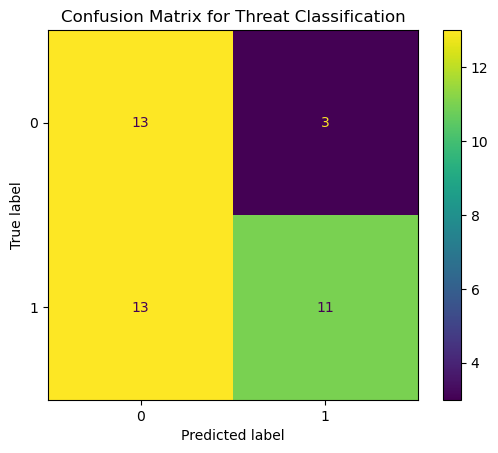

In [14]:
cm=confusion_matrix(y_test_class, y_pred_class)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Threat Classification")
plt.show()

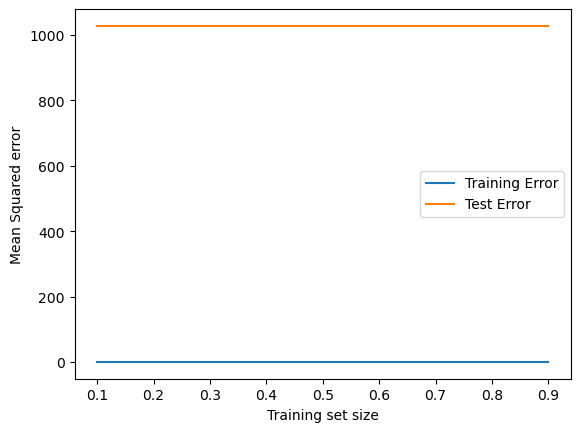

In [33]:
def plot_learning_curve(estimator, X, y, title):
    train_size=np.linspace(0.1,0.9,10)
    train_scores=[]
    test_scores=[]
    for size in train_size:
        X_trainpart, _, y_trainpart, _ =train_test_split(X, y, test_size=0.2, random_state=42)
        estimator.fit(X_trainpart, y_trainpart)
        train_scores.append(mean_squared_error(y_trainpart, estimator.predict(X_trainpart)))
        test_scores.append(mean_squared_error(y_test_reg, estimator.predict(X_test_reg)))
    plt.plot(train_size, train_scores, label="Training Error")
    plt.plot(train_size, test_scores, label="Test Error")
    plt.xlabel("Training set size")
    plt.ylabel("Mean Squared error")
    plt.legend()
    plt.show()
        
plot_learning_curve(xgb_regressor, X_train_reg, y_train_reg, "XGBoost regressor learning curve")        

In [35]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_reg)
X_test_scaled=scaler.transform(X_test_reg)

In [37]:
lasso=Lasso()
param_grid_lasso = {"alpha": np.logspace(-4, 0, 5)}
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train_scaled, y_train_reg)
best_lasso = grid_search_lasso.best_estimator_
lasso_pred=best_lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test_reg, lasso_pred)
print(f"Lasso reg best alpha: {grid_search_lasso.best_params_["alpha"],} mse:{mse_lasso}")

Lasso reg best alpha: (0.0001,) mse:85.85819940664098


In [39]:
ridge=Ridge()
param_grid_ridge = {"alpha": np.logspace(-4, 0, 5)}
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train_scaled, y_train_reg)
best_ridge = grid_search_ridge.best_estimator_
ridge_pred=best_ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test_reg, ridge_pred)
print(f"ridge reg best alpha: {grid_search_ridge.best_params_["alpha"],} mse:{mse_ridge}")

ridge reg best alpha: (0.1,) mse:85.99783846724206


In [44]:
svc = SVC()
param_grid_svc = {"C" : [0.1, 1,10], "kernel":["linear", "rbf"]}
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5)
grid_search_svc.fit(X_train_class, y_train_class)
best_svc = grid_search_svc.best_estimator_
svc_pred=best_svc.predict(X_test_scaled)
acc_svc = accuracy_score(y_test_class, svc_pred)
print(f"SVC best param: {grid_search_svc.best_params_}, Accuracy: {acc_svc}")

SVC best param: {'C': 10, 'kernel': 'rbf'}, Accuracy: 0.6


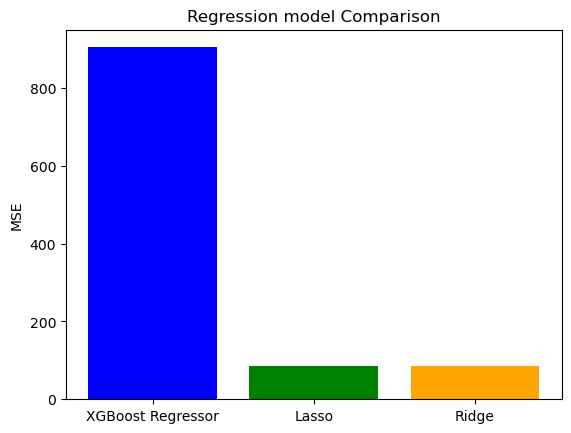

In [50]:
models = ["XGBoost Regressor", "Lasso", "Ridge"]
mses = [mse, mse_lasso, mse_ridge]
plt.bar(models, mses, color=["blue", "green", "orange"])
plt.ylabel("MSE")
plt.title("Regression model Comparison")
plt.show()

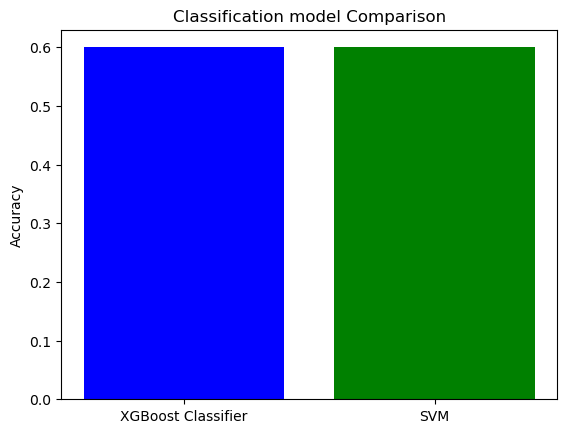

In [52]:
models_class=["XGBoost Classifier", "SVM"]
accs=[acc, acc_svc]
plt.bar(models_class, accs, color=["blue", "green"])
plt.ylabel("Accuracy")
plt.title("Classification model Comparison")
plt.show()